## Look at supply and demand of available datasets and ML models

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset_regular = '../datasets/Dataset_evolution_regular.csv'
dataset_consortia = '../datasets/Dataset_evolution_consortia.csv'

freesurfer_papers = '../datasets/FreeSurfer_papers.csv'
DL_papers = '../datasets/DL_papers.csv'

In [3]:
datasets_regular_df = pd.read_csv(dataset_regular)
datasets_regular_df['Number of datasets'] = 1
datasets_regular_df['Dataset Type'] = 'regular'

datasets_consortia_df = pd.read_csv(dataset_consortia)
datasets_consortia_df['Dataset'] = datasets_consortia_df['Working group']
datasets_consortia_df['Dataset Type'] = 'consortia'

useful_cols = ['Dataset','Sample size', 'Year', 'Number of datasets', 'Dataset Type']
datasets_df = datasets_regular_df[useful_cols].append(datasets_consortia_df[useful_cols])
datasets_df.head()

,Dataset,Sample size,Year,Number of datasets,Dataset Type
0,HCP,1200,2013,1,regular
1,GSP,1570,2015,1,regular
2,AOMIC,1370,2021,1,regular
3,CoRR,1629,2014,1,regular
4,SLIM,595,2017,1,regular


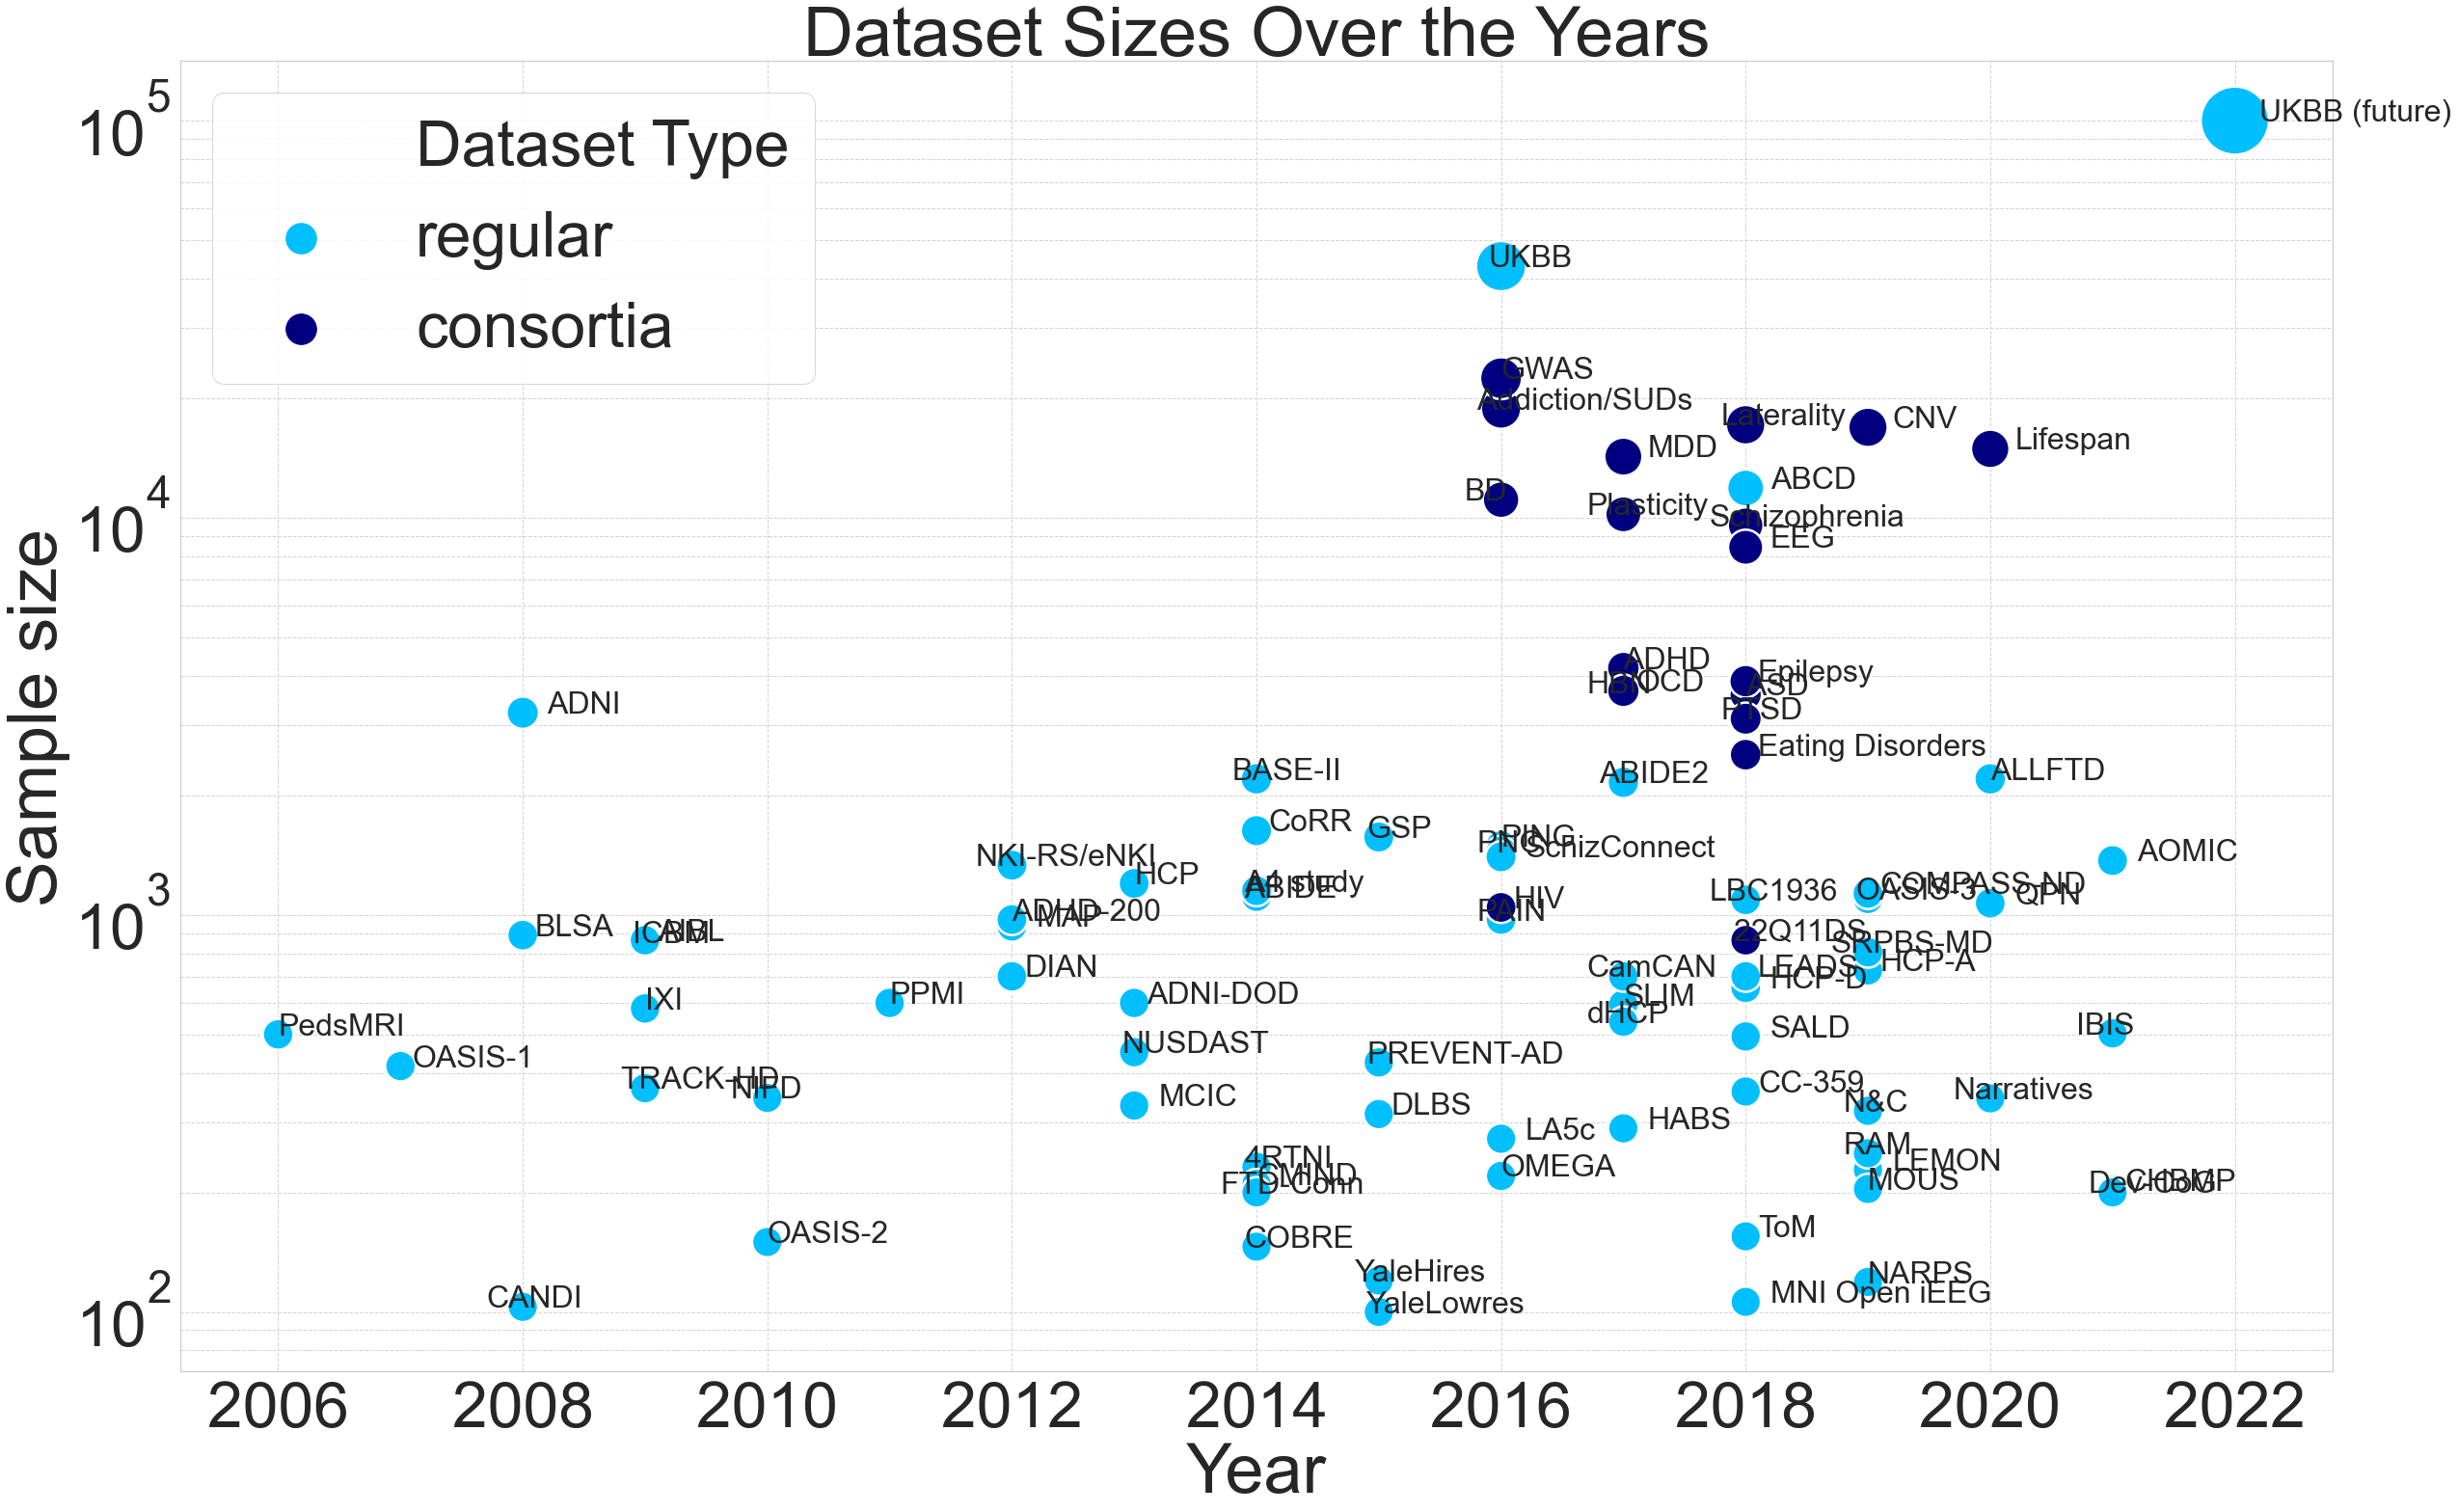

In [13]:
plot_df = datasets_df.copy()
plot_df['Year'] = plot_df['Year'].astype(int)
plot_df['Sample size'] = plot_df['Sample size'].astype(int)

sns.set(font_scale = 6)
palette = ['deepskyblue','navy'] #['tomato','firebrick'] # sns.color_palette("husl", 2)
with sns.axes_style("whitegrid"):
    fig, ax1 = plt.subplots(figsize=(40,25),sharex=True,sharey=True)
    g = sns.scatterplot(x='Year',y='Sample size', hue='Dataset Type', size='Sample size', sizes=(1000,5000), data=plot_df, palette=palette,ax=ax1)
    
    g.grid(True,which="both",ls="--",c='lightgray') 
    plt.title('Dataset Sizes Over the Years')

    g.set(yscale='log')
    # g.set(xlim=(1e6, 1e8))

    # EXTRACT CURRENT HANDLES AND LABELS
    h,l = ax1.get_legend_handles_labels() 
    col_lgd = plt.legend(h[:3], l[:3], loc='upper left')  
    col_lgd.legendHandles[1]._sizes = [1000]
    col_lgd.legendHandles[2]._sizes = [1000]
    
    # add model names as bubble labels
    def label_point(x, y, val, ax, x_shift=0, y_shift=0):
        a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
        for i, point in a.iterrows():
            x_shift, y_shift = 0.1*np.random.randint(-3,3, 2)
            ax.text(point['x']+x_shift, point['y']+y_shift, str(point['val']), fontsize=32)

    label_point(plot_df['Year'], plot_df['Sample size'], plot_df['Dataset'], plt.gca())

In [14]:
freesurfer_papers_df = pd.read_csv(freesurfer_papers)
DL_papers_df = pd.read_csv(DL_papers)

citation_df = pd.merge(freesurfer_papers_df, DL_papers_df, on='Year', how='left')

citation_df.head()

,Year,FS1,FS2,Total,N_AI-papers
0,2021,331,176,507,1099.0
1,2020,586,315,901,1929.0
2,2019,569,305,874,1649.0
3,2018,548,338,886,1104.0
4,2017,485,299,784,783.0


Text(0.5, 1.0, 'Number of Citations in Neuroimaging Studies')

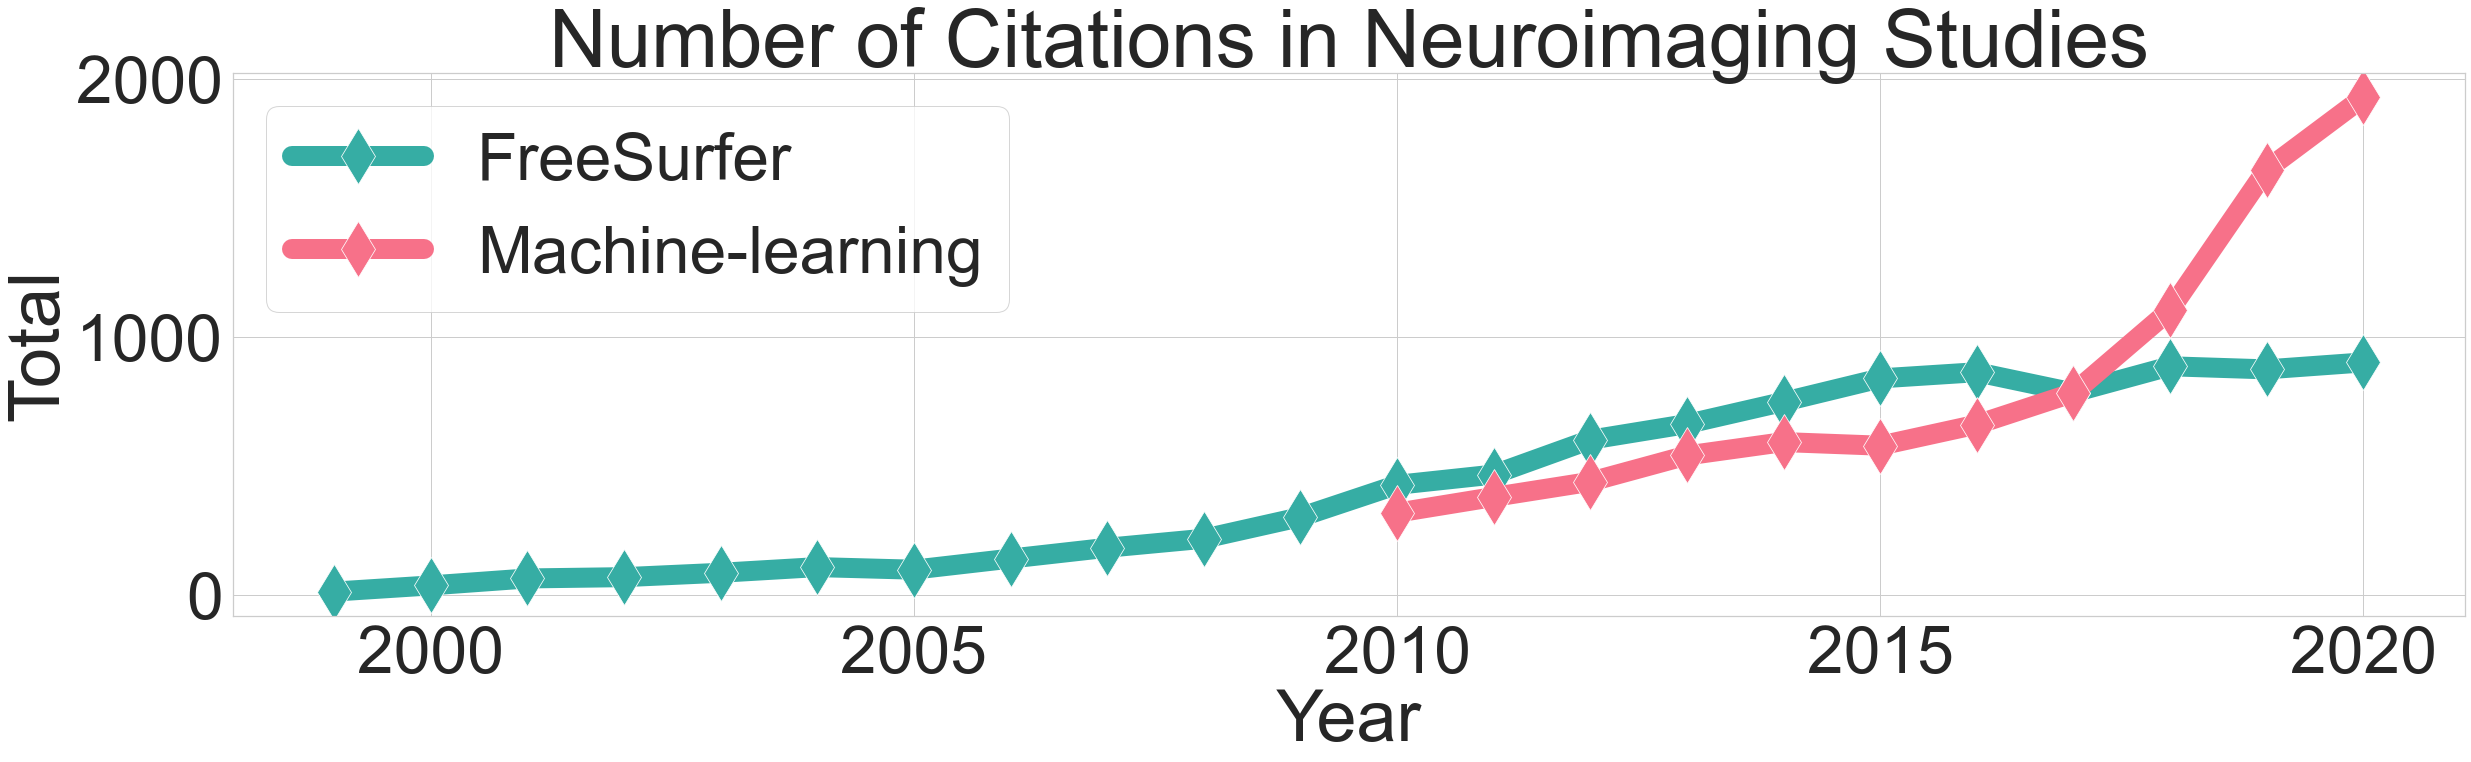

In [24]:
plot_df = citation_df[citation_df['Year']!=2021].copy()

pal = sns.color_palette("husl", 2)
with sns.axes_style("whitegrid"):
    fig, ax1 = plt.subplots(figsize=(40,10),sharex=True,sharey=True)
    sns.lineplot(x='Year',y='Total', marker='d', markersize=40, data=plot_df, linewidth = 20, color=pal[1], label='FreeSurfer')
    sns.lineplot(x='Year',y='N_AI-papers',marker='d', markersize=40, data=plot_df, linewidth = 20, color=pal[0], label='Machine-learning')

plt.title('Number of Citations in Neuroimaging Studies', fontsize=80)